In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [2]:
cv2.__version__

'3.1.0'

In [3]:
img1 = cv2.imread('img1.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('img2.png', cv2.IMREAD_COLOR)

In [4]:
# opencv : BGR, matplotlib : RGB
b, g, r = cv2.split(img1)
img1 = cv2.merge([r, g, b])
b, g, r = cv2.split(img2)
img2 = cv2.merge([r, g, b])

In [5]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [6]:
img1_file = plt.imread('img1.png')
img2_file = plt.imread('img2.png')

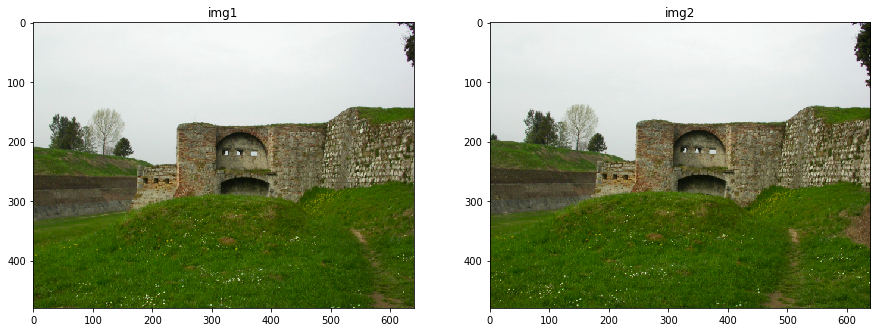

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img1)
plt.title('img1')

plt.subplot(122)
plt.imshow(img2)
plt.title('img2')
plt.show()

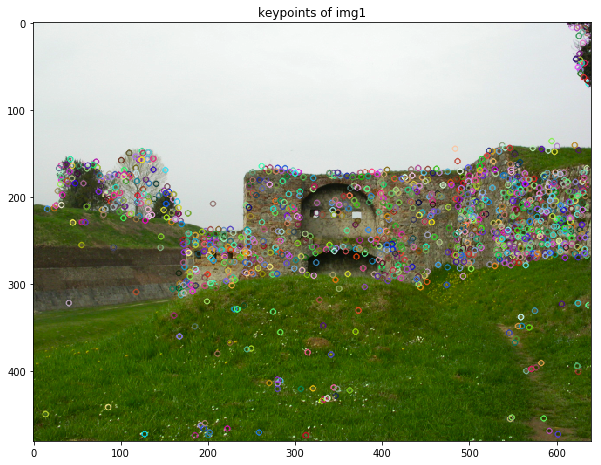

In [8]:
sift = cv2.xfeatures2d.SIFT_create()
(kp1, descs1) = sift.detectAndCompute(gray1, None)
sift_img = cv2.drawKeypoints(img1, kp1, None)

plt.figure(figsize=(10, 10))
plt.imshow(sift_img)
plt.title('keypoints of img1')
plt.show()

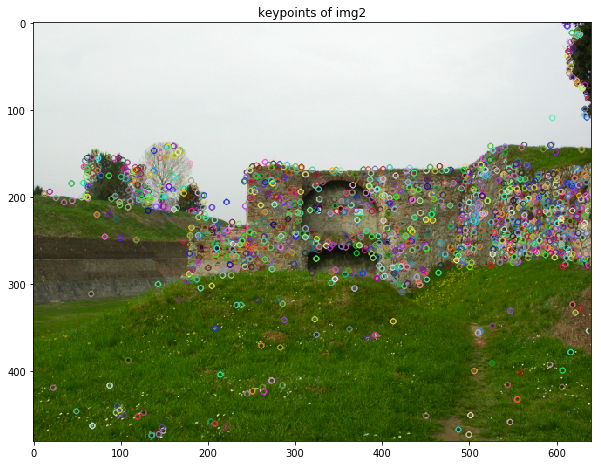

In [9]:
sift2 = cv2.xfeatures2d.SIFT_create()
(kp2, descs2) = sift.detectAndCompute(gray2, None)
sift_img2 = cv2.drawKeypoints(img2, kp2, None)

plt.figure(figsize=(10, 10))
plt.imshow(sift_img2)
plt.title('keypoints of img2')
plt.show()

In [10]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(descs1, descs2, k=2)

In [11]:
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

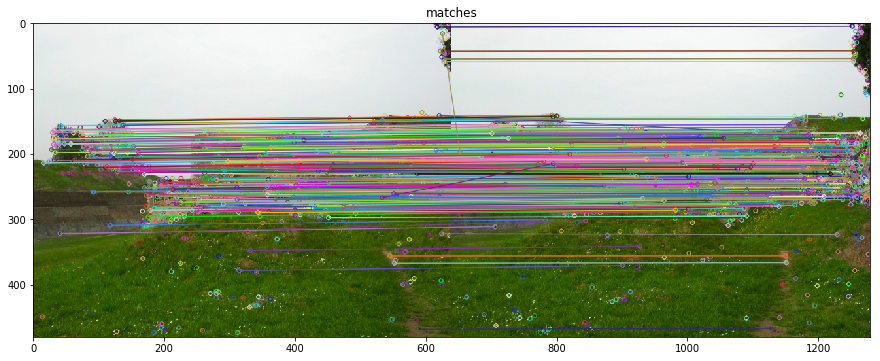

In [12]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None)
plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.title('matches')
plt.show()

In [21]:
# 매칭점 인덱스 알아내기
pt = []

for i in range(10, 18):
    pt.append((good[i][0].queryIdx, good[i][0].trainIdx))


In [22]:
# 매칭점 좌표 알아내기
coordi = []

for i in range(8):
    coordi.append((np.round(kp1[pt[i][0]].pt), np.round(kp2[pt[i][1]].pt)))

In [23]:
coordi

[(array([ 553.,  167.]), array([ 551.,  166.])),
 (array([ 635.,  167.]), array([ 625.,  168.])),
 (array([ 547.,  169.]), array([ 545.,  168.])),
 (array([ 298.,  169.]), array([ 301.,  165.])),
 (array([ 564.,  173.]), array([ 560.,  173.])),
 (array([ 564.,  173.]), array([ 560.,  173.])),
 (array([ 520.,  174.]), array([ 521.,  173.])),
 (array([  98.,  175.]), array([ 126.,  166.]))]

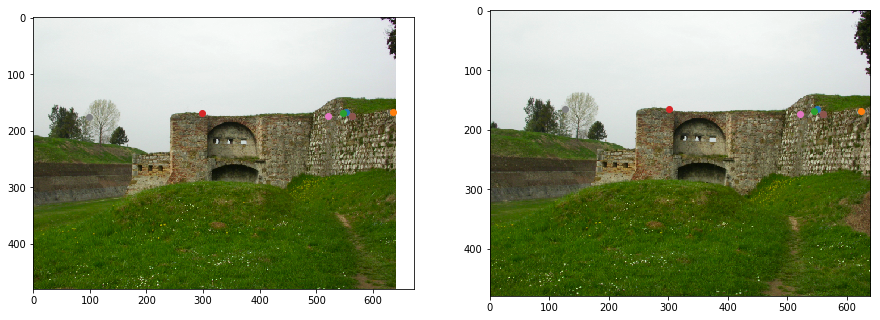

In [24]:
# 매징점 좌표 표시
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img1)
for i in range(8):
    plt.scatter(x=coordi[i][0][0], y=coordi[i][0][1])

plt.subplot(122)
plt.imshow(img2)
for i in range(8):
    plt.scatter(x=coordi[i][1][0], y=coordi[i][1][1])
plt.show()

In [25]:
# A Matrix 구하기
A = []

for i in range(8):
    A.append([coordi[i][0][0]*coordi[i][1][0], coordi[i][0][0]*coordi[i][1][1], coordi[i][0][0], coordi[i][0][1]*coordi[i][1][0], coordi[i][0][1]*coordi[i][1][1], coordi[i][0][1], coordi[i][1][0], coordi[i][1][1], 1])

In [26]:
# A 
df = pd.DataFrame(data=A)
df.style

In [27]:
# SVD(A)
U, S, V = np.linalg.svd(A)

In [28]:
# 

F = V.T[:, -1]
F = np.array(F)
print(F)

[ -1.29804121e-07   4.70755890e-06  -1.01733256e-04  -7.42514681e-06
   4.62115772e-05  -1.09081233e-03   7.07843093e-04  -1.29032752e-02
   9.99915897e-01]


In [29]:
F = F.reshape(3, 3)
df = pd.DataFrame(data=F)
df.style

In [30]:
# line
line = []
for i in range(8):
    line.append(np.dot(F, np.array([[coordi[i][1][0]], [coordi[i][1][1]], [1]])))

In [31]:
line= np.array(line)
line = line.reshape(8, 3)

In [32]:
# line vector

df = pd.DataFrame(data=line)
df

0         1         2
0  0.000608  0.002489 -0.752006
1  0.000608  0.002032 -0.725432
2  0.000618  0.002626 -0.782060
3  0.000636  0.004299 -0.916064
4  0.000640  0.002746 -0.835959
5  0.000640  0.002746 -0.835959
6  0.000645  0.003035 -0.863564
7  0.000663  0.005645 -1.052840

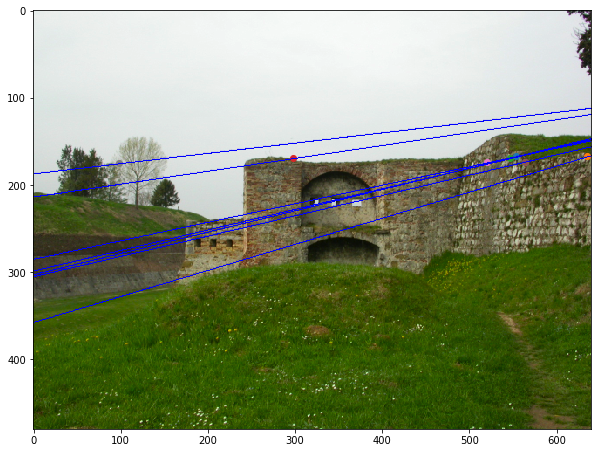

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(img1)
for i in range(8):
    plt.scatter(x=coordi[i][0][0], y=coordi[i][0][1])
    for j in range(1, 640):
        y = -(line[i][0]*j + line[i][2]) / line[i][1]
        plt.plot([j], [y], marker='1', markersize=1, color='blue')
        
plt.show()

In [34]:
np_img1 = np.zeros((3, 8))
np_img2 = np.zeros((3, 8))

for i in range(8):
    np_img1[:, i] = [coordi[i][0][0], coordi[i][0][1], 1]
    np_img2[:, i] = [coordi[i][1][0], coordi[i][1][1], 1]
    
np_img1 = np.array(np_img1)
np_img2 = np.array(np_img2)

In [35]:
# Normalized 

def normalize(pts):
    
    # centroid 구하기
    C = [np.mean(pts[0]), np.mean(pts[1])]
    print(C)
    
    new_pts = np.zeros((3, 8))
    
    # shift the origin to centroid
    new_pts[0] = pts[0] - C[0]
    new_pts[1] = pts[1] - C[1]
    
    mean_dist = np.mean(np.sqrt(np.power(new_pts[0], 2) + np.power(new_pts[1], 2)))
    print(mean_dist)
    scale = np.sqrt(2) / mean_dist
    print(scale)
    
    T = [[scale, 0, -scale*C[0]], [0, scale, -scale*C[1]], [0, 0, 1]]
    print(T)
    npts = np.dot(T, pts)
    
    return npts, T

In [36]:
npt_left, T1 = normalize(np_img1)

[472.375, 170.875]
137.230909521
0.0103053573522
[[0.010305357352164035, 0, -4.8679931792284865], [0, 0.010305357352164035, -1.7609279375510296], [0, 0, 1]]


In [37]:
npt_right, T2 = normalize(np_img2)

[473.625, 169.0]
130.122678911
0.0108683096153
[[0.010868309615298066, 0, -5.1475031415455463], [0, 0.010868309615298066, -1.836744324985373], [0, 0, 1]]


In [38]:
nA = np.zeros((8, 9))

for i in range(8):
    nx_left = npt_left[0, i]
    ny_left = npt_left[1, i]
    nx_right = npt_right[0, i]
    ny_right = npt_right[1, i]
    
    nA[i, :] = [nx_left*nx_right, nx_left*ny_right, nx_left, ny_left*nx_right, ny_left*ny_right, ny_left, nx_right, ny_right, 1]

In [39]:
Un, Dn, Vn = np.linalg.svd(nA)

In [40]:
nF = Vn.conj().T[:, -1].reshape(3, 3)

In [56]:
nF

array([[ 0.01287585, -0.51408737, -0.06518499],
       [ 0.65120985, -0.53215144, -0.11823925],
       [ 0.06518263,  0.07606796, -0.00492521]])

In [45]:
nU, nD, nV = np.linalg.svd(nF)

In [46]:
nF = np.dot(np.dot(nU, np.diag([nD[0], nD[1], 0])),nV.conj().T)

In [58]:
nF = np.dot(np.dot(np.array(T2).conj().T, nF), np.array(T1))

In [48]:
nF

array([[ -1.18753694e-05,  -1.09011597e-05,   1.44859578e-02],
       [  4.46264977e-07,   1.84250695e-06,  -1.81830263e-04],
       [  4.90355473e-03,   4.24555305e-03,  -6.04621908e+00]])

In [35]:
df = pd.DataFrame(data=F)
df

0             1         2
0  1.434639e-07  1.214693e-07 -0.002312
1  1.028284e-05 -8.344807e-06 -0.014664
2  3.643366e-04  1.059618e-02  0.999834

In [59]:
df = pd.DataFrame(data=nF)
df

0         1         2
0  7.725666e-07 -0.000031  0.004460
1  3.907336e-05 -0.000032 -0.011691
2 -6.438317e-03  0.018939 -0.206554

In [37]:
nLine = []

for i in range(8):
    nLine.append(np.dot(F.T, np.array([[coordi[i][0][0]], [coordi[i][0][1]], [1]])))


In [38]:
nLine= np.array(nLine)
nLine.reshape(8, 3)

array([[  2.17267045e-03,   9.27973291e-03,  -2.91691416e+00],
       [  2.18061131e-03,   9.25235400e-03,  -2.74282863e+00],
       [  2.14488879e-03,   9.22210815e-03,  -2.16725937e+00],
       [  2.22418156e-03,   9.22103975e-03,  -2.84078155e+00],
       [  2.22418156e-03,   9.22103975e-03,  -2.84078155e+00],
       [  2.22815198e-03,   9.20735029e-03,  -2.75373878e+00],
       [  2.17789304e-03,   9.14774545e-03,  -1.79294027e+00],
       [  2.17789304e-03,   9.14774545e-03,  -1.79294027e+00]])

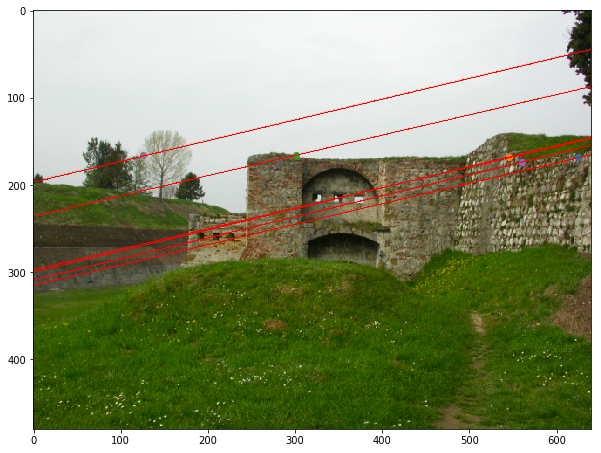

In [39]:
plt.figure(figsize=(10, 10))
plt.imshow(img2)

for i in range(8):
    plt.scatter(x=coordi[i][1][0], y=coordi[i][1][1])
    for j in range(1, 640):
        y = - (nLine[i][0]*j + nLine[i][2]) / nLine[i][1]
        plt.plot([j], [y], marker='1', markersize=1, color='red')

plt.show()

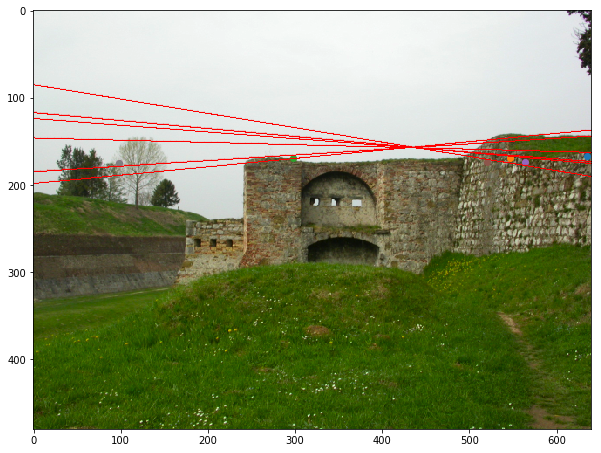

In [60]:
nLine = []

for i in range(8):
    nLine.append(np.dot(nF, np.array([[coordi[i][0][0]], [coordi[i][0][1]], [1]])))

nLine= np.array(nLine)
nLine.reshape(8, 3)

plt.figure(figsize=(10, 10))
plt.imshow(img1)

for i in range(8):
    plt.scatter(x=coordi[i][0][0], y=coordi[i][0][1])
    for j in range(1, 640):
        y = - (nLine[i][0]*j + nLine[i][2]) / nLine[i][1]
        plt.plot([j], [y], marker='1', markersize=1, color='red')

plt.show()